In [1]:
# Set up environment

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math

%matplotlib inline

In [2]:
# Load data

file1 = 'V2_Cleaned_Baseline_Diabetes.csv'
diab = pd.read_csv(file1,na_values=[-999,'999',-888,'-888'])
diab.shape

file2 = 'V2_Cleaned_Baseline_Depression.csv'
dep = pd.read_csv(file2,na_values=[-999,'999',-888,'-888'])
dep.shape

(62, 109)

(66, 105)

In [3]:
base_cols = ['Q3_1', 'Q3_2', 'Q3_3', 'Q3_4', 'Q3_5',
     'Q6_1', 'Q6_2', 'Q6_3', 'Q6_4', 'Q6_5', 'Q7_1', 'Q7_2',
       'Q7_3', 'Q7_4', 'Q7_5', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q13_2_TEXT', 'Q14', 'Q18','Q32', 'Q19', 'Q20', 'Q21', 'Q21_3_TEXT', 
        'Q22', 'Q23', 'Q24','Q25','Q27', 'Q28', 
             'Q29', 'Q30', 'Q30_2_TEXT', 'Q31']

In [4]:
# Retrieve dataset for baseline descriptive analysis

base_diab = diab[base_cols]
base_diab.shape

base_dep = dep[base_cols]
base_dep.shape

#base_diab.columns.values == base_dep.columns.values

base = pd.concat([base_diab,base_dep])
base.shape

(62, 39)

(66, 39)

(128, 39)

['Total', 127, 'Missing', 1]


18-29    0.015748
30-39    0.086614
40-49    0.055118
50-59    0.149606
60-69    0.354331
70-79    0.283465
80+      0.055118
Name: Q18, dtype: float64

<BarContainer object of 7 artists>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age range of Participants')

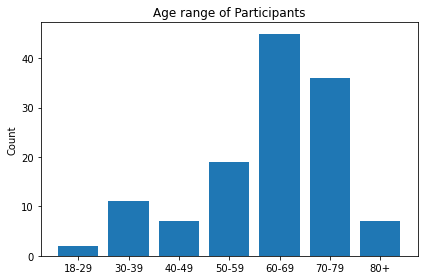

In [5]:
# Q18 - age

Q18_idx =['18-29','30-39','40-49','50-59','60-69','70-79','80+']
Q18_dict = {1:'18-29',2: '30-39',3: '40-49',4:'50-59',5:'60-69',6:'70-79',7:'80+'}
Q18 = list(base['Q18'].value_counts().sort_index())

Q18_n = base['Q18'].value_counts().sum()
Q18_missing = 128-Q18_n
print(['Total',Q18_n,'Missing',Q18_missing])
base['Q18'].value_counts(normalize=True).sort_index().rename(Q18_dict)

plt.bar(Q18_idx,Q18)
plt.ylabel('Count')
plt.title('Age range of Participants')
plt.tight_layout()

['Total', 121, 'Missing', 7]


Male      0.206612
Female    0.793388
Name: Q32, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd09f11c820>,
 [Text(0.8762980049001194, 0.6649073669377339, 'Male'),
  Text(-0.8762980049001194, -0.6649073669377339, 'Female'),
  Text(1.1, -2.6942229581241775e-16, 'Other')],
 [Text(0.47798072994551966, 0.36267674560240026, '20.7%'),
  Text(-0.47798072994551966, -0.36267674560240026, '79.3%'),
  Text(0.6, -1.4695761589768238e-16, '0.0%')])

Text(0.5, 1.0, 'Sex of Participants')

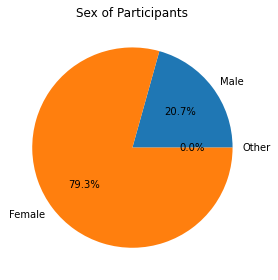

In [6]:
# Q32 - Sex

Q32_idx =['Male','Female','Other']
Q32_dict = {1:'Male',2:'Female',3:'Other'}
Q32 = list(base['Q32'].value_counts().sort_index())

Q32_n = base['Q32'].value_counts().sum()
Q32_missing = 128-Q32_n
print(['Total',Q32_n,'Missing',Q32_missing])
base['Q32'].value_counts(normalize=True).sort_index().rename(Q32_dict)

Q32.append(0)
plt.pie(Q32,labels=Q32_idx,autopct='%1.1f%%')
plt.title('Sex of Participants')
plt.tight_layout()

['Total', 125, 'Missing', 3]


1,2,4    0.008
2        0.008
3        0.056
3,4      0.024
4        0.760
4,5      0.024
5        0.120
Name: Q19, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd09f2369d0>,
 [Text(2.749131520446578, 0.06910776575092949, 'American Indian/Alaska Native, Asian/Pacific Islander, Latino/Hispanic'),
  Text(2.7421869749748424, 0.2071487250221993, 'Asian/Pacific Islander'),
  Text(2.6455760892014437, 0.7506178496715857, 'Black/African American'),
  Text(2.3757893747177743, 1.3849638432024598, 'Black/African American, Latino/Hispanic'),
  Text(-2.7187922926528656, 0.4131204054647688, 'Latino/Hispanic'),
  Text(1.8571651365024708, -2.0281611513288973, 'Latino/Hispanic, White'),
  Text(2.5568852854841326, -1.0123426479580546, 'White')],
 [Text(1.4995262838799517, 0.037695144955052454, '0.8%'),
  Text(1.4957383499862777, 0.11299021364847235, '0.8%'),
  Text(1.4430415032007873, 0.4094279180026831, '5.6%'),
  Text(1.2958851134824223, 0.755434823564978, '2.4%'),
  Text(-1.4829776141742903, 0.22533840298078298, '76.0%'),
  Text(1.0129991653649841, -1.1062697189066713, '2.4%'),
  Text(1.3946647011731632, -0.5521868988862116,

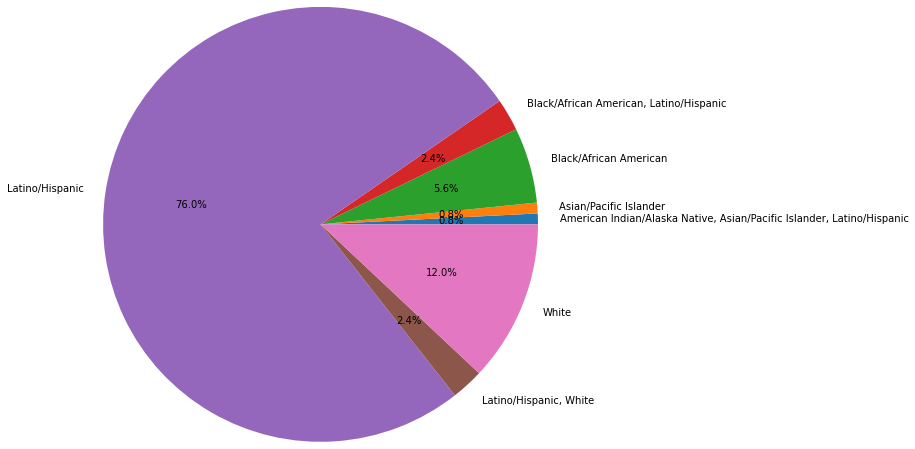

In [7]:
# Race/ethnicity

Q19_idx = ["American Indian/Alaska Native, Asian/Pacific Islander, Latino/Hispanic",
          "Asian/Pacific Islander", "Black/African American", 
           "Black/African American, Latino/Hispanic","Latino/Hispanic", 
          "Latino/Hispanic, White", "White"]
Q19_dict = {1:"American Indian/Alaska Native, Asian/Pacific Islander, Latino/Hispanic",
           2: "Asian/Pacific Islander", 3: "Black/African American",
           4: "Black/African American, Latino/Hispanic",
           5:"Latino/Hispanic", 6:"Latino/Hispanic, White", 7:"White"  }
Q19 = list(base['Q19'].value_counts().sort_index())

Q19_n = base['Q19'].value_counts().sum()
Q19_missing = 128-Q19_n
print(['Total',Q19_n,'Missing',Q19_missing])
base['Q19'].value_counts(normalize=True).sort_index().rename(Q19_dict)

plt.pie(Q19,radius = 2.5,labels=Q19_idx,autopct='%1.1f%%')
# plt.legend(labels=Q19_idx)

['Total', 109, 'Missing', 19]


11th grade or less           0.266055
High school or GED           0.266055
Some college                 0.229358
Bachelor's Degree            0.146789
Master's degree or higher    0.091743
Name: Q20, dtype: float64

<BarContainer object of 5 artists>

Text(0.5, 0, 'Count')

Text(0.5, 1.0, 'Highest level of education completed')

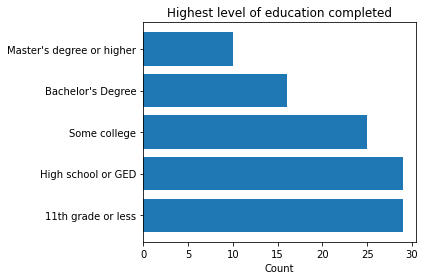

In [8]:
#Q20

Q20_idx = ['11th grade or less','High school or GED','Some college', 
           "Bachelor's Degree","Master's degree or higher"]
Q20_dict = {1:'11th grade or less',2:'High school or GED',3:'Some college', 
           4:"Bachelor's Degree",5:"Master's degree or higher"}
Q20 = list(base['Q20'].value_counts().sort_index())

Q20_n = base['Q20'].value_counts().sum()
Q20_missing = 128-Q20_n
print(['Total',Q20_n,'Missing',Q20_missing])
base['Q20'].value_counts(normalize=True).sort_index().rename(Q20_dict)

plt.barh(Q20_idx,Q20)
plt.xlabel('Count')

plt.title('Highest level of education completed')
plt.tight_layout()

['Total', 126, 'Missing', 2]


English    0.349206
Spanish    0.650794
Name: Q21, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd09f6a1ee0>,
 [Text(0.5018316954487894, 0.9788590038626573, 'English'),
  Text(-0.5018316038013927, -0.9788590508475274, 'Spanish'),
  Text(1.0999999999999808, 2.0597886516129914e-07, 'Other')],
 [Text(0.27372637933570326, 0.5339230930159948, '34.9%'),
  Text(-0.27372632934621416, -0.5339231186441058, '65.1%'),
  Text(0.5999999999999894, 1.1235210826979952e-07, '0.0%')])

Text(0.5, 1.0, 'Preferred Language')

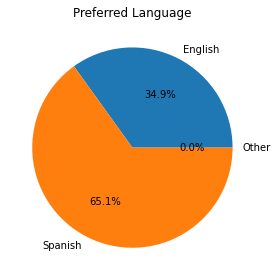

In [9]:
Q21_idx = ['English','Spanish','Other']
Q21_dict = {1:'English',2:'Spanish',3:'Other'}

Q21 = list(base['Q21'].value_counts().sort_index())
Q21.append(0)
Q21_n = base['Q21'].value_counts().sum()
Q21_missing = 128-Q21_n
print(['Total',Q21_n,'Missing',Q21_missing])
base['Q21'].value_counts(normalize=True).sort_index().rename(Q21_dict)

plt.pie(Q21,labels=Q21_idx,autopct='%1.1f%%')
plt.title('Preferred Language')
plt.tight_layout()

['Total', 124, 'Missing', 4]


10032.0    0.266129
10033.0    0.338710
10034.0    0.080645
10040.0    0.314516
Name: Q22, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd09f786ac0>,
 [Text(0.7374232913747002, 0.8162149774036889, '10032'),
  Text(-1.0108536386373126, 0.4337913337697117, '10033'),
  Text(-0.6733164822844275, -0.8698533868900691, '10034'),
  Text(0.6053220783023535, -0.9184689333449005, '10040')],
 [Text(0.40223088620438185, 0.44520816949292114, '26.6%'),
  Text(-0.5513747119839887, 0.23661345478347906, '33.9%'),
  Text(-0.3672635357915059, -0.47446548375821945, '8.1%'),
  Text(0.33017567907401096, -0.5009830545517638, '31.5%')])

Text(0.5, 1.0, 'Zip code')

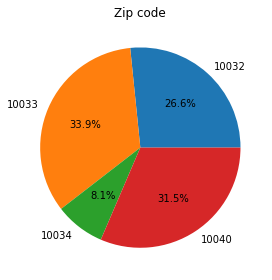

In [10]:
Q22_idx = ['10032','10033','10034','10040']
Q22_dict = {1:'10032',2:'10033',3:'10034',4:'10040'}
Q22= list(base['Q22'].value_counts().sort_index())

Q22_n = base['Q22'].value_counts().sum()
Q22_missing = 128-Q22_n
print(['Total',Q22_n,'Missing',Q22_missing])
base['Q22'].value_counts(normalize=True).sort_index().rename(Q22_dict)

plt.pie(Q22,labels=Q22_idx,autopct='%1.1f%%')
plt.title('Zip code')
plt.tight_layout()

['Total', 125, 'Missing', 3]


Weak                 0.048
Relatively Weak      0.008
Neutral              0.280
Relatively Strong    0.336
Strong               0.328
Name: Q24, dtype: float64

<BarContainer object of 5 artists>

Text(0.5, 0, 'Count')

Text(0.5, 1.0, 'Attachment to WAHI')

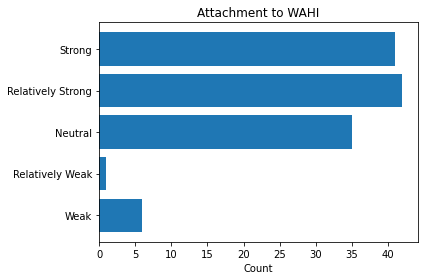

In [11]:
Q24_idx = ['Weak','Relatively Weak','Neutral','Relatively Strong','Strong']
Q24_dict = {1:'Weak',2:'Relatively Weak',3:'Neutral',4:'Relatively Strong',5:'Strong'}
Q24 = list(base['Q24'].value_counts().sort_index())

Q24_n = base['Q24'].value_counts().sum()
Q24_missing = 128-Q24_n
print(['Total',Q24_n,'Missing',Q24_missing])
base['Q24'].value_counts(normalize=True).sort_index().rename(Q24_dict)

plt.barh(Q24_idx,Q24)
plt.xlabel('Count')

plt.title('Attachment to WAHI')
plt.tight_layout()

['Total', 124, 'Missing', 4]


Mostly Negative      0.016129
Somewhat Negative    0.056452
Neutral              0.201613
Somewhat Positive    0.395161
Mostly Positive      0.330645
Name: Q25, dtype: float64

<BarContainer object of 5 artists>

Text(0.5, 0, 'Count')

Text(0.5, 1.0, 'Overall feeling toward WAHI')

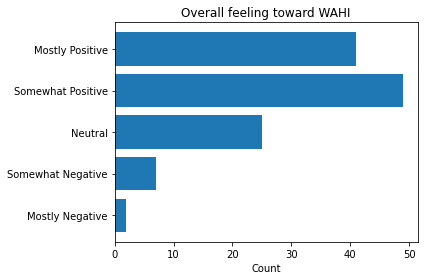

In [12]:
Q25_idx = ['Mostly Negative','Somewhat Negative','Neutral',
           'Somewhat Positive','Mostly Positive']
Q25_dict = {1:'Mostly Negative',2:'Somewhat Negative',3:'Neutral',
           4:'Somewhat Positive',5:'Mostly Positive'}
Q25 = list(base['Q25'].value_counts().sort_index())

Q25_n = base['Q25'].value_counts().sum()
Q25_missing = 128-Q25_n
print(['Total',Q25_n,'Missing',Q25_missing])
base['Q25'].value_counts(normalize=True).sort_index().rename(Q25_dict)

plt.barh(Q25_idx,Q25)
plt.xlabel('Count')

plt.title('Overall feeling toward WAHI')
plt.tight_layout()

['Total', 101, 'Missing', 27]


< $20K/year    0.742574
$20K-$39K      0.148515
$40K-$59K      0.069307
$60K+          0.039604
Name: Q27, dtype: float64

<BarContainer object of 4 artists>

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Income Level')

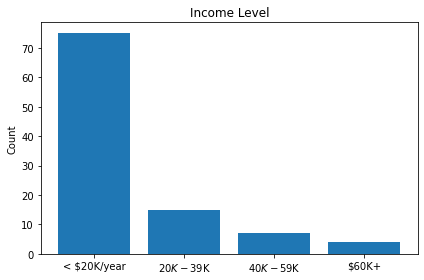

In [13]:
Q27_idx = ['< $20K/year','$20K-$39K','$40K-$59K','$60K+']
Q27_dict = {1:'< $20K/year',2:'$20K-$39K',3:'$40K-$59K',4:'$60K+'}
Q27 = list(base['Q27'].value_counts().sort_index())

Q27_n = base['Q27'].value_counts().sum()
Q27_missing = 128-Q27_n
print(['Total',Q27_n,'Missing',Q27_missing])
base['Q27'].value_counts(normalize=True).sort_index().rename(Q27_dict)

plt.bar(Q27_idx,Q27)
plt.ylabel('Count')

plt.title('Income Level')
plt.tight_layout()

['Total', 107, 'Missing', 21]


Married or with domestic partner    0.327103
Divorced                            0.327103
Widowed                             0.130841
Never Married                       0.214953
Name: Q28, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd09fb4cf10>,
 [Text(0.5685399676689666, 0.9416805749100756, 'Married or with domestic partner'),
  Text(-1.0981040399588466, 0.06455631205435905, 'Divorced'),
  Text(-0.20865676421000795, -1.0800288675537377, 'Widowed'),
  Text(0.85857446430666, -0.6876408141177575, 'Never Married')],
 [Text(0.31011270963761817, 0.5136439499509503, '32.7%'),
  Text(-0.5989658399775527, 0.035212533847832204, '32.7%'),
  Text(-0.11381278047818615, -0.5891066550293115, '13.1%'),
  Text(0.468313344167269, -0.375076807700595, '21.5%')])

Text(0.5, 1.0, 'Current Marital Status')

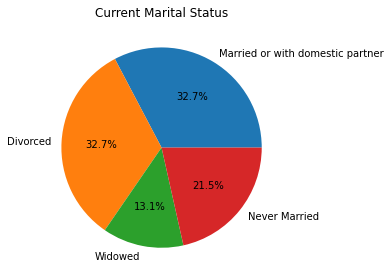

In [14]:
Q28_idx = ['Married or with domestic partner', 'Divorced','Widowed','Never Married']
Q28_dict = {1:'Married or with domestic partner',2:'Divorced',
           3:'Widowed',4:'Never Married'}
Q28 = list(base['Q28'].value_counts().sort_index())

Q28_n = base['Q28'].value_counts().sum()
Q28_missing = 128-Q28_n
print(['Total',Q28_n,'Missing',Q28_missing])
base['Q28'].value_counts(normalize=True).sort_index().rename(Q28_dict)

plt.pie(Q28,labels=Q28_idx,autopct='%1.1f%%')
plt.title('Current Marital Status')
plt.tight_layout()

['Total', 124, 'Missing', 4]


Yes    0.362903
No     0.637097
Name: Q29, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd09fd591c0>,
 [Text(0.45925985528762253, 0.9995400869005666, 'Yes'),
  Text(-0.4592598552876231, -0.9995400869005664, 'No')],
 [Text(0.25050537561143044, 0.5452036837639453, '36.3%'),
  Text(-0.2505053756114307, -0.5452036837639452, '63.7%')])

Text(0.5, 1.0, 'Do you live alone?')

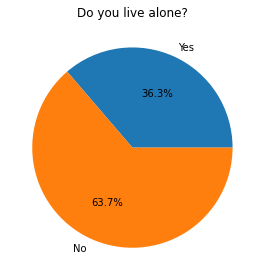

In [15]:
Q29_idx = ['Yes','No']
Q29_dict = {1:'Yes',2:'No'}
Q29 = list(base['Q29'].value_counts().sort_index())

Q29_n = base['Q29'].value_counts().sum()
Q29_missing = 128-Q29_n
print(['Total',Q29_n,'Missing',Q29_missing])
base['Q29'].value_counts(normalize=True).sort_index().rename(Q29_dict)

plt.pie(Q29,labels=Q29_idx,autopct='%1.1f%%')
plt.title('Do you live alone?')
plt.tight_layout()

['Total', 125, 'Missing', 3]


U.S.A.    0.24
Other     0.76
Name: Q30, dtype: float64

([<matplotlib.patches.Wedge at 0x7fd09fe1a7c0>,
 [Text(0.8018655028537539, 0.7530018030078657, 'U.S.A.'),
  Text(-0.8018655381043116, -0.7530017654698314, 'Other')],
 [Text(0.43738118337477483, 0.4107282561861085, '24.0%'),
  Text(-0.43738120260235175, -0.4107282357108171, '76.0%')])

Text(0.5, 1.0, 'Country of birth')

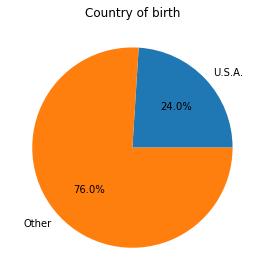

In [16]:
Q30_idx = ['U.S.A.','Other']
Q30_dict = {1:'U.S.A.',2:'Other'}
Q30 = list(base['Q30'].value_counts().sort_index())

Q30_n = base['Q30'].value_counts().sum()
Q30_missing = 128-Q30_n
print(['Total',Q30_n,'Missing',Q30_missing])
base['Q30'].value_counts(normalize=True).sort_index().rename(Q30_dict)

plt.pie(Q30,labels=Q30_idx,autopct='%1.1f%%')
plt.title('Country of birth')
plt.tight_layout()

In [17]:
base['Q30_2_TEXT'].value_counts().sum()
base['Q30'].value_counts()

90

2.0    95
1.0    30
Name: Q30, dtype: int64

In [19]:
base.to_csv('Baseline_data.csv',index=False)